In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.stats as stats

In [8]:
alphap = 3

dir_data = "../../data/alpha{}/".format(alphap)
dir_figure = "../../figure/alpha{}/".format(alphap)

fig_filename = dir_figure + "z_alpha_{}.pdf".format(alphap)

## Plotting

In [9]:
import glob
files = glob.glob(dir_data + "fractal_dim_*")

In [10]:
files

['../../data/alpha3/fractal_dim_alpha_3_p_0_25',
 '../../data/alpha3/fractal_dim_alpha_3_p_0_75',
 '../../data/alpha3/fractal_dim_alpha_3_p_0_50']

In [11]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

In [12]:
#fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
colors = ['tab:blue', 'tab:orange', 'tab:green']
i = 0
data_dct = dict()
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        p = head['probability']
        pass
    data = np.loadtxt(file)
    data_dct[p] = data
    t, N, M = data.T
    x, y, slope, intercept = convert_to_plot(N, M)
    #plt.plot(x, y, 'o', color=colors[i], markersize=4)
    #plt.plot(x, x*slope + intercept, label="p={}".format(p),  color=colors[i])
    i += 1
    pass
#plt.legend()
#plt.xlabel("")
#plt.ylabel("")

../../figure/alpha3/z_alpha_3.pdf


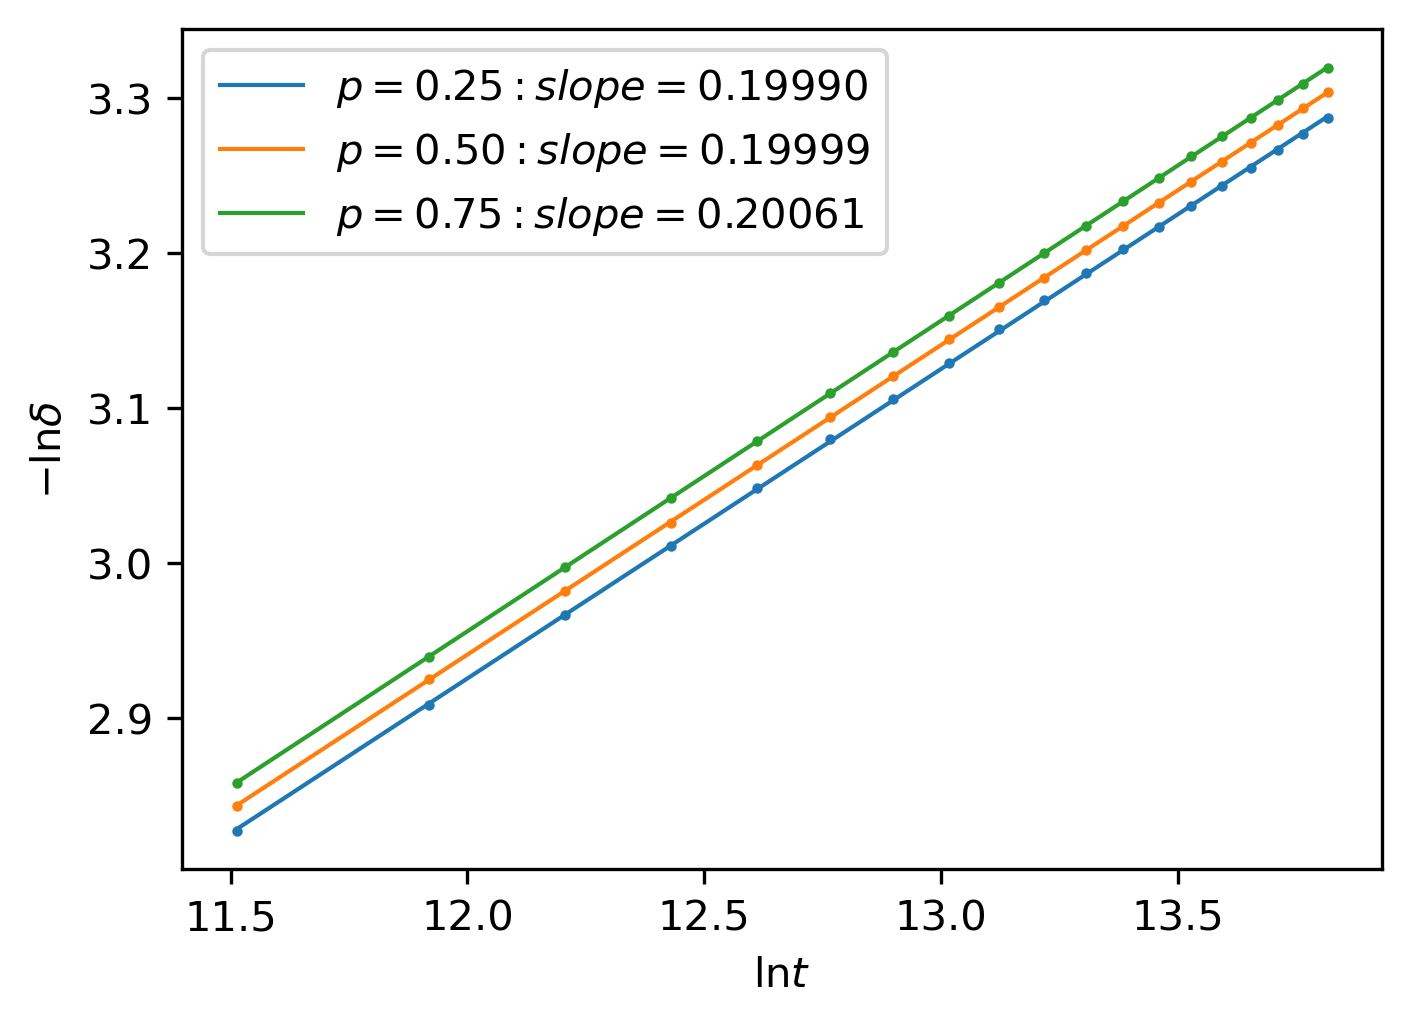

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
probabilities = [0.25, 0.5, 0.75]
i = 0
for p in probabilities:
    data = data_dct[p]
    t, N, M = data.T
    y, yyy, slope, intercept = convert_to_plot(N, M)
    log_t = np.log(t)
    
    regress = stats.linregress(log_t, y)
    plt.plot(log_t, y, 'o', color=colors[i], markersize=1.5)
    yyyyy = log_t*regress[0] + regress[1]
    plt.plot(log_t, yyyyy, label=r"$p={:.2f}: slope={:.5f}$".format(p, regress[0]),  color=colors[i], linewidth=1)
    i += 1
    pass
# plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.5, 0.5))
plt.legend(loc=2)
plt.ylabel(r"$-\ln \delta$")
plt.xlabel(r"$\ln t$")
# plt.ylim([0.5, 3])
ax.set_position([0.15, 0.15, 0.8, 0.8])
print(fig_filename)
# plt.savefig(fig_filename)